# Lab2

### Import Libraries

In [220]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Read the CSV dataset file

In [221]:
df = pd.read_csv('bmi_data_lab2.csv')
df.head()

,Sex,Age,Height (Inches),Weight (Pounds),BMI
0,Female,21,65.78331,112.9925,2.0
1,Female,35,NaN,136.4873,3.0
2,Female,27,69.39874,153.0269,3.0
3,Male,24,68.21660,142.3354,3.0
4,Female,18,67.78781,144.2971,3.0


## Data Exploration

### Print dataset statistical data

In [222]:
df.describe()

,Age,Height (Inches),Weight (Pounds),BMI
count,150.000000,146.000000,150.000000,145.000000
mean,26.413333,80.133994,129.703405,2.751724
std,5.206071,96.579662,88.179891,0.449244
min,18.000000,-130.926162,-161.994913,1.000000
25%,22.000000,66.599598,120.391125,3.000000
50%,26.500000,68.219095,128.538050,3.000000
75%,31.000000,69.432848,136.170900,3.000000
max,35.000000,665.465059,1110.621115,3.000000


### feature names

In [223]:
df.columns

Index(['Sex', 'Age', 'Height (Inches)', 'Weight (Pounds)', 'BMI'], dtype='object')

In [224]:
df.columns = ['Sex','Age','Height','Weight','BMI']

### data types

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     150 non-null    object 
 1   Age     150 non-null    int64  
 2   Height  146 non-null    float64
 3   Weight  150 non-null    float64
 4   BMI     145 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.0+ KB


In [226]:
df.dtypes

Sex        object
Age         int64
Height    float64
Weight    float64
BMI       float64
dtype: object

### plot height histograms(bins=10) for each BMI value

In [227]:
df['BMI'].unique()

array([ 2.,  3., nan,  1.])

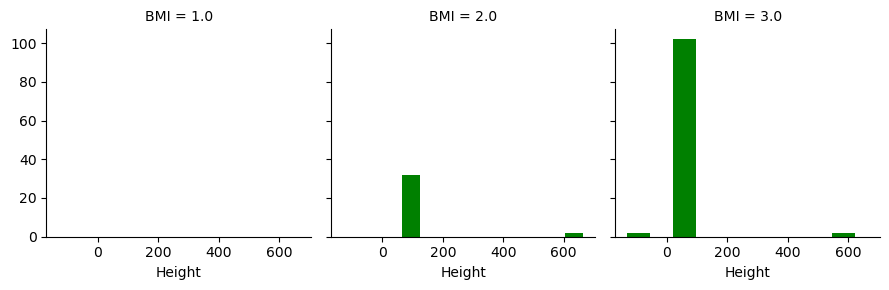

In [228]:
facet = sns.FacetGrid(df, col='BMI')
facet = facet.map(plt.hist,'Height',bins=10,color='g')

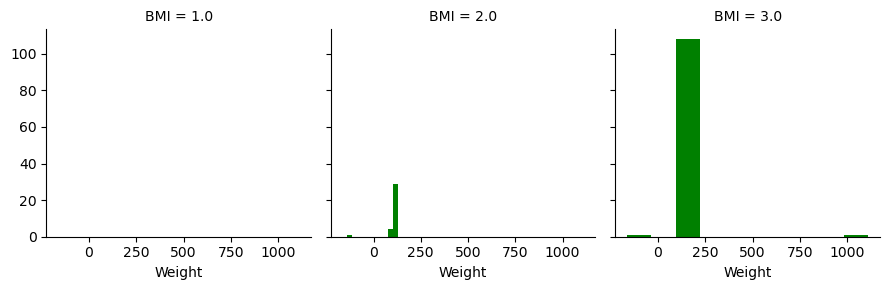

In [229]:
facet = sns.FacetGrid(df, col='BMI')
facet = facet.map(plt.hist,'Weight',bins=10,color='g')

### Plot scaling results for height and weight

#### RobustScaler

In [230]:
tmp = df.copy()

In [231]:
Scaler = RobustScaler()
tmp['Height'] = Scaler.fit_transform(df[['Height']])
Scaler = RobustScaler()
tmp['Weight'] = Scaler.fit_transform(df[['Weight']])

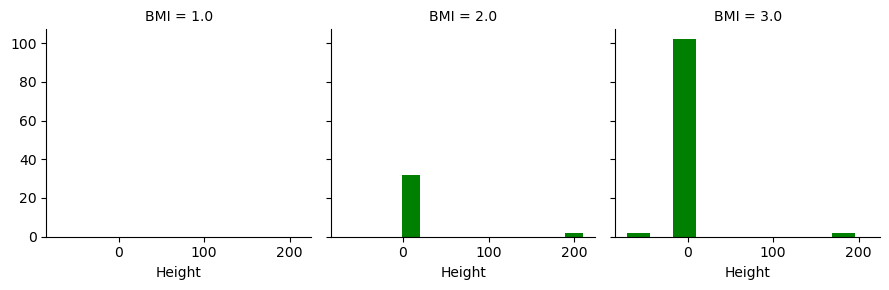

In [232]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Height',bins=10,color='g')

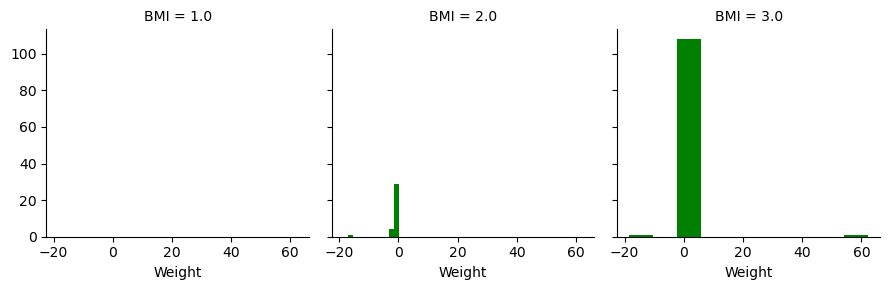

In [233]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Weight',bins=10,color='g')

#### StandardScaler

In [234]:
tmp = df.copy()

In [235]:
Scaler = StandardScaler()
tmp['Height'] = Scaler.fit_transform(df[['Height']])
Scaler = StandardScaler()
tmp['Weight'] = Scaler.fit_transform(df[['Weight']])

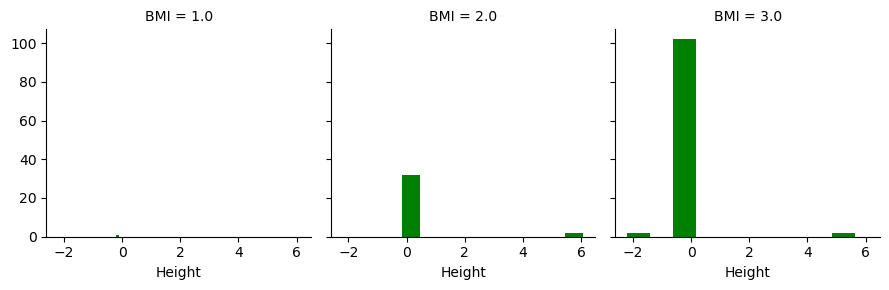

In [236]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Height',bins=10,color='g')

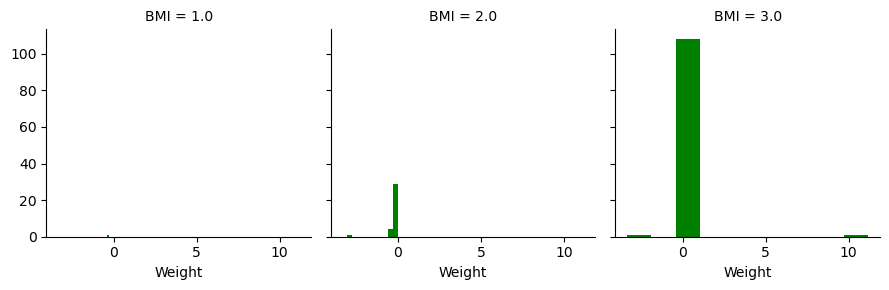

In [237]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Weight',bins=10,color='g')

#### MinMaxScaler

In [238]:
tmp = df.copy()

In [239]:
Scaler = MinMaxScaler()
tmp['Height'] = Scaler.fit_transform(df[['Height']])
Scaler = MinMaxScaler()
tmp['Weight'] = Scaler.fit_transform(df[['Weight']])

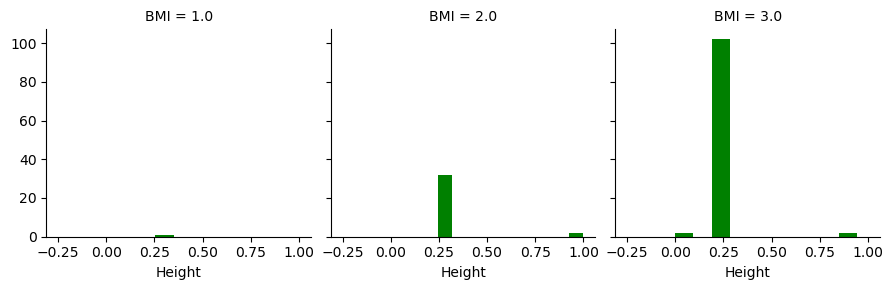

In [240]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Height',bins=10,color='g')

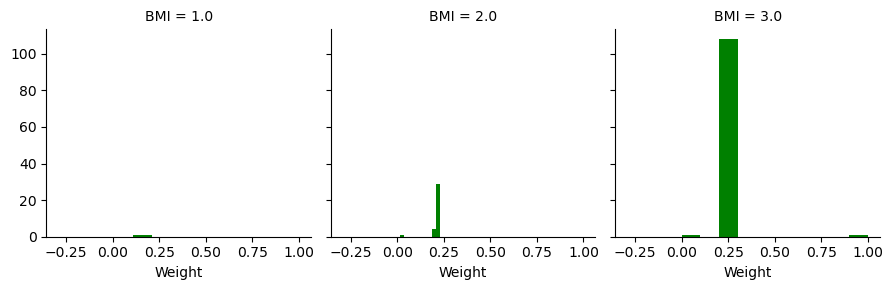

In [241]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Weight',bins=10,color='g')

## Missing value maniqulation

### Identify all dirty records with likely-wrong or missing height or weight values

In [242]:
df.isna().sum()

Sex       0
Age       0
Height    4
Weight    0
BMI       5
dtype: int64

### Remove all likely-wrong values

#### Sex

In [243]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

#### Age

In [244]:
df['Age'].unique()

array([21, 35, 27, 24, 18, 22, 19, 28, 25, 34, 23, 20, 31, 32, 29, 30, 26,
       33])

<Axes: ylabel='Age'>

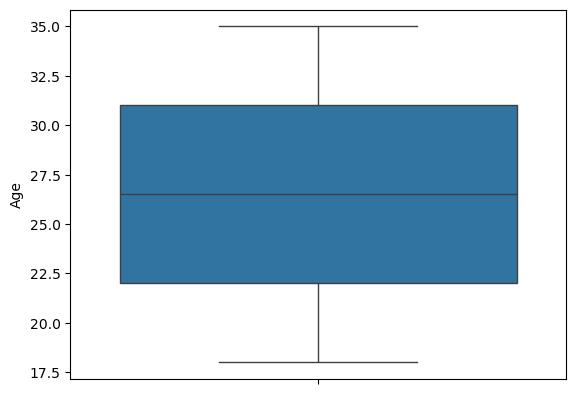

In [245]:
sns.boxplot(df['Age'])

#### Height

<Axes: ylabel='Height'>

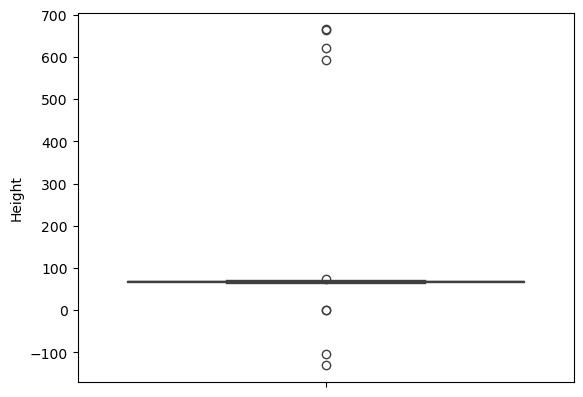

In [246]:
sns.boxplot(df['Height'])

In [247]:
Q3 = df['Height'].quantile(.75)
Q1 = df['Height'].quantile(.25)
IOR = (Q3 - Q1)*1.5
df['Height'] = np.where(df['Height']>Q3 + IOR, np.nan,df['Height'])
df['Height'] = np.where(df['Height']<Q1 - IOR, np.nan,df['Height'])

<Axes: ylabel='Height'>

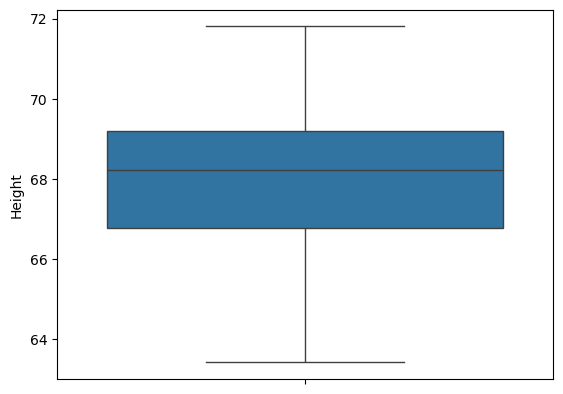

In [248]:
sns.boxplot(df['Height'])

#### Weight

<Axes: ylabel='Weight'>

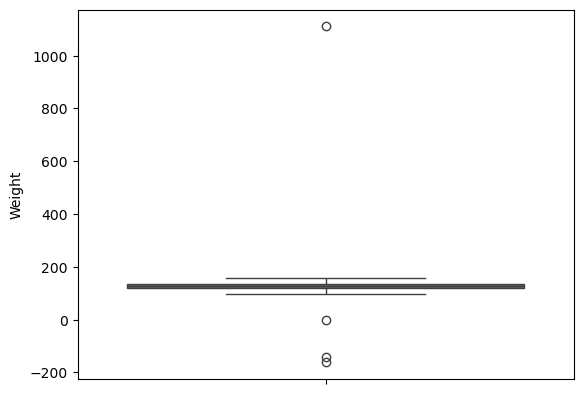

In [249]:
sns.boxplot(df['Weight'])

In [250]:
Q3 = df['Weight'].quantile(.75)
Q1 = df['Weight'].quantile(.25)
IOR = (Q3 - Q1)*1.5
df['Weight'] = np.where(df['Weight']>Q3 + IOR, np.nan,df['Weight'])
df['Weight'] = np.where(df['Weight']<Q1 - IOR, np.nan,df['Weight'])

<Axes: ylabel='Weight'>

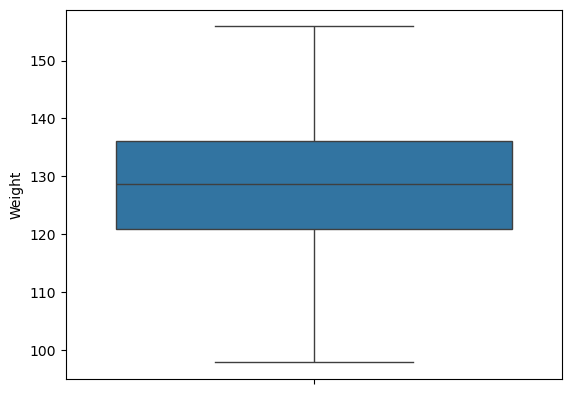

In [251]:
sns.boxplot(df['Weight'])

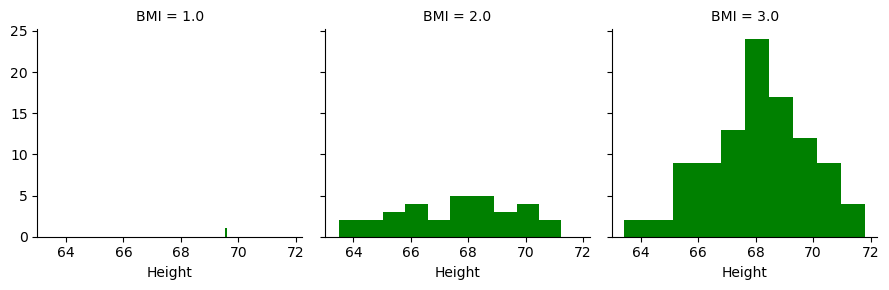

In [252]:
facet = sns.FacetGrid(df, col='BMI')
facet = facet.map(plt.hist,'Height',bins=10,color='g')

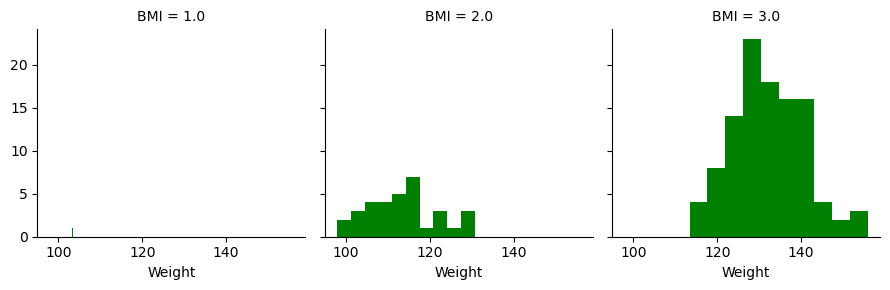

In [253]:
facet = sns.FacetGrid(df, col='BMI')
facet = facet.map(plt.hist,'Weight',bins=10,color='g')

In [254]:
tmp = df.copy()
Scaler = RobustScaler()
tmp['Height'] = Scaler.fit_transform(df[['Height']])
Scaler = RobustScaler()
tmp['Weight'] = Scaler.fit_transform(df[['Weight']])

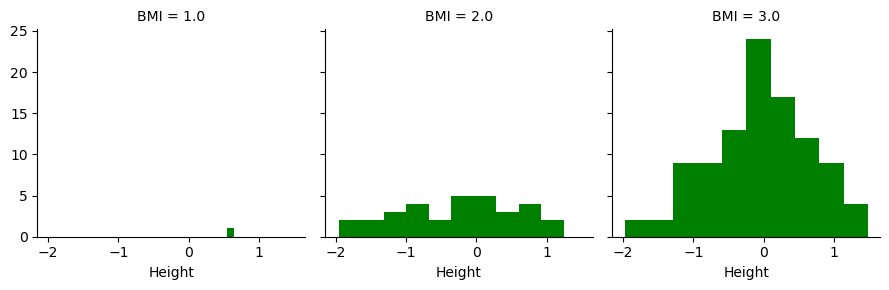

In [255]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Height',bins=10,color='g')

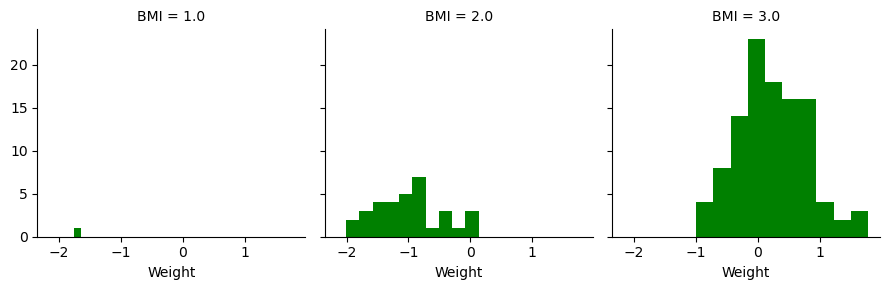

In [256]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Weight',bins=10,color='g')

In [257]:
tmp = df.copy()
Scaler = StandardScaler()
tmp['Height'] = Scaler.fit_transform(df[['Height']])
Scaler = StandardScaler()
tmp['Weight'] = Scaler.fit_transform(df[['Weight']])

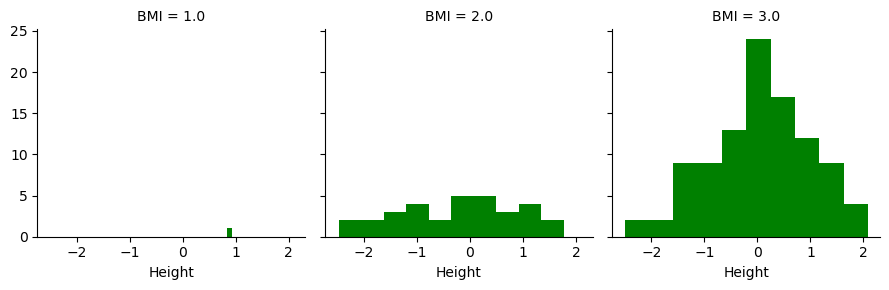

In [258]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Height',bins=10,color='g')

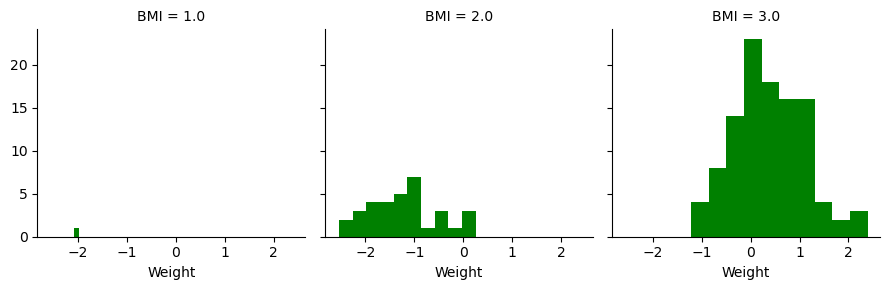

In [259]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Weight',bins=10,color='g')

In [260]:
tmp = df.copy()
Scaler = MinMaxScaler()
tmp['Height'] = Scaler.fit_transform(df[['Height']])
Scaler = MinMaxScaler()
tmp['Weight'] = Scaler.fit_transform(df[['Weight']])

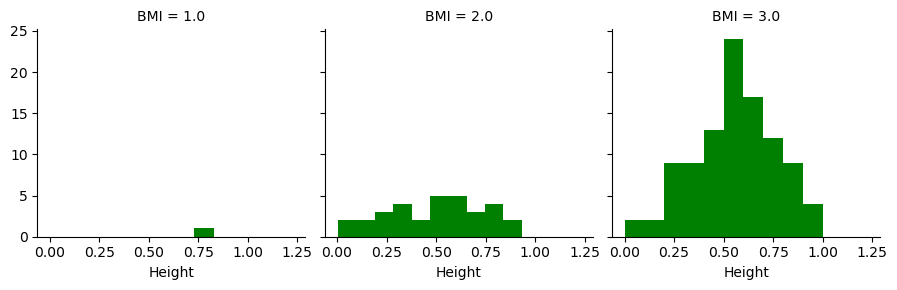

In [261]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Height',bins=10,color='g')

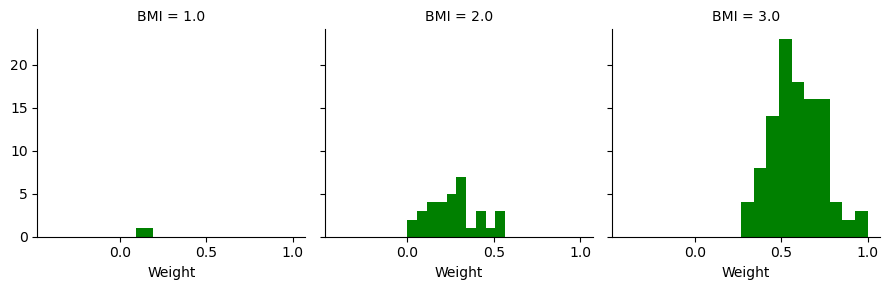

In [262]:
facet = sns.FacetGrid(tmp, col='BMI')
facet = facet.map(plt.hist,'Weight',bins=10,color='g')

#### BMI

In [263]:
df['BMI'].unique()

array([ 2.,  3., nan,  1.])

In [264]:
df['BMI'].value_counts()

BMI
3.0    110
2.0     34
1.0      1
Name: count, dtype: int64

#### Print # of rows with NAN, and # of NAN for each column

In [265]:
nan_df = df[df['Height'].isna() | df['Weight'].isna() | df['BMI'].isna()]
nan_df

,Sex,Age,Height,Weight,BMI
1,Female,35,NaN,136.4873,3.0
6,Male,35,69.80204,141.4947,NaN
9,Male,25,NaN,120.6672,3.0
10,Male,34,NaN,127.4516,NaN
17,Female,31,NaN,142.9733,3.0
33,Male,21,NaN,136.2225,3.0
41,Female,31,NaN,124.8591,3.0
47,Male,31,NaN,116.8190,2.0
48,Male,21,69.82117,NaN,NaN
54,Male,27,65.38356,123.4892,NaN


In [266]:
len(nan_df)

19

### Extract all rows without NAN

In [267]:
clean_df = df.dropna(how='any')
clean_df.head()

,Sex,Age,Height,Weight,BMI
0,Female,21,65.78331,112.9925,2.0
2,Female,27,69.39874,153.0269,3.0
3,Male,24,68.21660,142.3354,3.0
4,Female,18,67.78781,144.2971,3.0
5,Female,22,68.69784,123.3024,2.0


### Fill NAN with mean, median, or using ffill / bfill methods

In [268]:
example_df = df.copy()

#### mean

In [269]:
height_mean = np.mean(df[df['Height'].notna()]['Height'])
height_mean

68.00279459854015

In [270]:
weight_mean = np.mean(df[df['Weight'].notna()]['Weight'])
weight_mean

127.73088178082193

#### median

In [271]:
height_median = np.median(df[df['Height'].notna()]['Height'])
height_median

68.21868

In [272]:
weight_median = np.median(df[df['Weight'].notna()]['Weight'])
weight_median

128.6436

In [273]:
df['Height'] = df['Height'].fillna((height_mean + height_median)/2)
df['Weight'] = df['Weight'].fillna((weight_mean + weight_median)/2)

In [274]:
df['BMI'] = df['BMI'].ffill()

In [275]:
df.isna().sum()

Sex       0
Age       0
Height    0
Weight    0
BMI       0
dtype: int64

## Cleaning the Input Dataset

In [276]:
clean_df.head()

,Sex,Age,Height,Weight,BMI
0,Female,21,65.78331,112.9925,2.0
2,Female,27,69.39874,153.0269,3.0
3,Male,24,68.21660,142.3354,3.0
4,Female,18,67.78781,144.2971,3.0
5,Female,22,68.69784,123.3024,2.0


In [277]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     131 non-null    object 
 1   Age     131 non-null    int64  
 2   Height  131 non-null    float64
 3   Weight  131 non-null    float64
 4   BMI     131 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.1+ KB


In [278]:
nan_df.reset_index(drop=True, inplace=True)
nan_df

,Sex,Age,Height,Weight,BMI
0,Female,35,NaN,136.4873,3.0
1,Male,35,69.80204,141.4947,NaN
2,Male,25,NaN,120.6672,3.0
3,Male,34,NaN,127.4516,NaN
4,Female,31,NaN,142.9733,3.0
5,Male,21,NaN,136.2225,3.0
6,Female,31,NaN,124.8591,3.0
7,Male,31,NaN,116.8190,2.0
8,Male,21,69.82117,NaN,NaN
9,Male,27,65.38356,123.4892,NaN


In [279]:
nan_df[nan_df['Height'].isna()]['Weight'].to_numpy()[:,np.newaxis]

array([[136.4873],
       [120.6672],
       [127.4516],
       [142.9733],
       [136.2225],
       [124.8591],
       [116.819 ],
       [124.7299],
       [131.5916],
       [136.5479],
       [127.6064],
       [132.6792],
       [151.3913]])

In [280]:
h_idx = nan_df[nan_df['Height'].isna()].index
h_idx

Index([0, 2, 3, 4, 5, 6, 7, 10, 11, 12, 14, 15, 17], dtype='int64')

In [281]:
model = linear_model.LinearRegression()
model.fit(clean_df['Weight'].to_numpy()[:,np.newaxis], clean_df['Height'].to_numpy()[:,np.newaxis])
pred_height_nan = model.predict(nan_df[nan_df['Height'].isna()]['Weight'].to_numpy()[:,np.newaxis])
for i, j in enumerate(h_idx):
    nan_df.at[int(j), 'Height'] = pred_height_nan[i][0]

In [282]:
nan_df

,Sex,Age,Height,Weight,BMI
0,Female,35,68.756338,136.4873,3.0
1,Male,35,69.802040,141.4947,NaN
2,Male,25,67.468348,120.6672,3.0
3,Male,34,68.020698,127.4516,NaN
4,Female,31,69.284395,142.9733,3.0
5,Male,21,68.734780,136.2225,3.0
6,Female,31,67.809631,124.8591,3.0
7,Male,31,67.155047,116.8190,2.0
8,Male,21,69.821170,NaN,NaN
9,Male,27,65.383560,123.4892,NaN


#### Height = Weight*W1 + W0
#### Height - W0 = Weight * W1
#### (Height - W0) / W1 = Weight

In [283]:
w1 = model.coef_
w0 = model.intercept_

def cal_weight(w1:float,w0:float,x) -> list:
    y = []
    for i in x:
        y.append((i[0]-w0)/w1)
    return y

pred_weight_nan = cal_weight(w1,w0,nan_df[nan_df['Weight'].isna()]['Height'].to_numpy()[:,np.newaxis])
pred_weight_nan

[array([[149.56639024]]),
 array([[124.19434987]]),
 array([[154.72306835]]),
 array([[84.1677287]])]

In [284]:
w_idx = nan_df[nan_df['Weight'].isna()].index
w_idx

Index([8, 13, 16, 18], dtype='int64')

In [285]:
for i, j in enumerate(w_idx):
    nan_df.at[int(j), 'Weight'] = pred_weight_nan[i][0]

In [286]:
nan_df

,Sex,Age,Height,Weight,BMI
0,Female,35,68.756338,136.487300,3.0
1,Male,35,69.802040,141.494700,NaN
2,Male,25,67.468348,120.667200,3.0
3,Male,34,68.020698,127.451600,NaN
4,Female,31,69.284395,142.973300,3.0
5,Male,21,68.734780,136.222500,3.0
6,Female,31,67.809631,124.859100,3.0
7,Male,31,67.155047,116.819000,2.0
8,Male,21,69.821170,149.566390,NaN
9,Male,27,65.383560,123.489200,NaN


### fill missing data about BMI

In [287]:
nan_df['BMI'] = nan_df['BMI'].ffill()
nan_df

,Sex,Age,Height,Weight,BMI
0,Female,35,68.756338,136.487300,3.0
1,Male,35,69.802040,141.494700,3.0
2,Male,25,67.468348,120.667200,3.0
3,Male,34,68.020698,127.451600,3.0
4,Female,31,69.284395,142.973300,3.0
5,Male,21,68.734780,136.222500,3.0
6,Female,31,67.809631,124.859100,3.0
7,Male,31,67.155047,116.819000,2.0
8,Male,21,69.821170,149.566390,2.0
9,Male,27,65.383560,123.489200,2.0


In [288]:
clean_df

,Sex,Age,Height,Weight,BMI
0,Female,21,65.78331,112.9925,2.0
2,Female,27,69.39874,153.0269,3.0
3,Male,24,68.21660,142.3354,3.0
4,Female,18,67.78781,144.2971,3.0
5,Female,22,68.69784,123.3024,2.0
...,...,...,...,...,...
144,Male,22,65.18417,107.1564,2.0
145,Female,20,68.26209,116.4588,2.0
146,Female,28,68.56865,133.8402,3.0
148,Male,19,68.71053,130.7568,3.0


### dots not in line are only missing BMI value

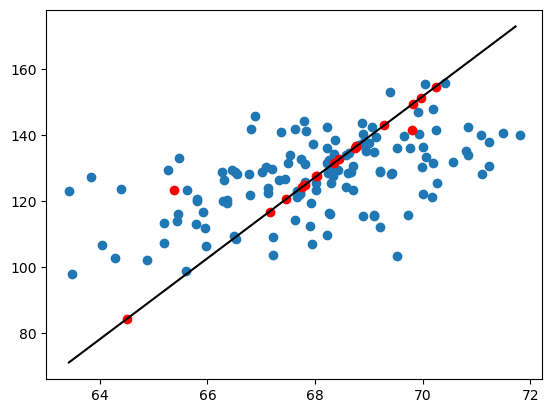

In [289]:
plt.scatter(x=clean_df['Height'],y=clean_df['Weight'])
plt.scatter(x=nan_df['Height'],y=nan_df['Weight'],color='r')
x= np.arange(np.min(clean_df['Height']),np.max(clean_df['Height']),0.1)
plt.plot(x,((x-w0)/w1)[0],color='black')
plt.show()

In [290]:
nan_df.sort_values(by='Height')

,Sex,Age,Height,Weight,BMI
18,Female,30,64.496750,84.167729,3.0
9,Male,27,65.383560,123.489200,2.0
7,Male,31,67.155047,116.819000,2.0
2,Male,25,67.468348,120.667200,3.0
13,Female,18,67.755510,124.194350,2.0
10,Female,26,67.799112,124.729900,2.0
6,Female,31,67.809631,124.859100,3.0
3,Male,34,68.020698,127.451600,3.0
14,Male,34,68.033301,127.606400,2.0
11,Female,27,68.357756,131.591600,3.0


#### cleaning input dataset(With Sex) 

In [291]:
nan_df = example_df[example_df['Height'].isna() | example_df['Weight'].isna() | example_df['BMI'].isna()]
nan_df.reset_index(drop=True,inplace=True)
nan_df

,Sex,Age,Height,Weight,BMI
0,Female,35,NaN,136.4873,3.0
1,Male,35,69.80204,141.4947,NaN
2,Male,25,NaN,120.6672,3.0
3,Male,34,NaN,127.4516,NaN
4,Female,31,NaN,142.9733,3.0
5,Male,21,NaN,136.2225,3.0
6,Female,31,NaN,124.8591,3.0
7,Male,31,NaN,116.8190,2.0
8,Male,21,69.82117,NaN,NaN
9,Male,27,65.38356,123.4892,NaN


In [292]:
clean_df

,Sex,Age,Height,Weight,BMI
0,Female,21,65.78331,112.9925,2.0
2,Female,27,69.39874,153.0269,3.0
3,Male,24,68.21660,142.3354,3.0
4,Female,18,67.78781,144.2971,3.0
5,Female,22,68.69784,123.3024,2.0
...,...,...,...,...,...
144,Male,22,65.18417,107.1564,2.0
145,Female,20,68.26209,116.4588,2.0
146,Female,28,68.56865,133.8402,3.0
148,Male,19,68.71053,130.7568,3.0


In [293]:
nan_df['BMI'] = nan_df['BMI'].ffill()
nan_df

,Sex,Age,Height,Weight,BMI
0,Female,35,NaN,136.4873,3.0
1,Male,35,69.80204,141.4947,3.0
2,Male,25,NaN,120.6672,3.0
3,Male,34,NaN,127.4516,3.0
4,Female,31,NaN,142.9733,3.0
5,Male,21,NaN,136.2225,3.0
6,Female,31,NaN,124.8591,3.0
7,Male,31,NaN,116.8190,2.0
8,Male,21,69.82117,NaN,2.0
9,Male,27,65.38356,123.4892,2.0


In [294]:
man_df = clean_df[clean_df['Sex']=='Male']
wom_df = clean_df[clean_df['Sex']=='Female']
man_nan_df = nan_df[nan_df['Sex']=='Male']
wom_nan_df = nan_df[nan_df['Sex']=='Female']

In [295]:
def cal_weight(w1:float,w0:float,x) -> list:
        y = []
        for i in x:
            y.append((i[0]-w0)/w1)
        return y

def fillWH(clean_df:pd.DataFrame, nan_df:pd.DataFrame):
    model = linear_model.LinearRegression()
    model.fit(clean_df['Weight'].to_numpy()[:,np.newaxis], clean_df['Height'].to_numpy()[:,np.newaxis])
    pred_height_nan = model.predict(nan_df[nan_df['Height'].isna()]['Weight'].to_numpy()[:,np.newaxis])
    h_idx = nan_df[nan_df['Height'].isna()].index
    for i, j in enumerate(h_idx):
        nan_df.at[j, 'Height'] = pred_height_nan[i][0]
    w1 = model.coef_
    w0 = model.intercept_

    pred_weight_nan = cal_weight(w1,w0,nan_df[nan_df['Weight'].isna()]['Height'].to_numpy()[:,np.newaxis])
    w_idx = nan_df[nan_df['Weight'].isna()].index
    for i, j in enumerate(w_idx):
        nan_df.at[int(j), 'Weight'] = pred_weight_nan[i][0]
        
    return nan_df, w1, w0

In [296]:
tmp1,tmp1_w1,tmp1_w0 = fillWH(man_df,man_nan_df)
tmp2,tmp2_w1,tmp2_w0 = fillWH(wom_df,wom_nan_df)

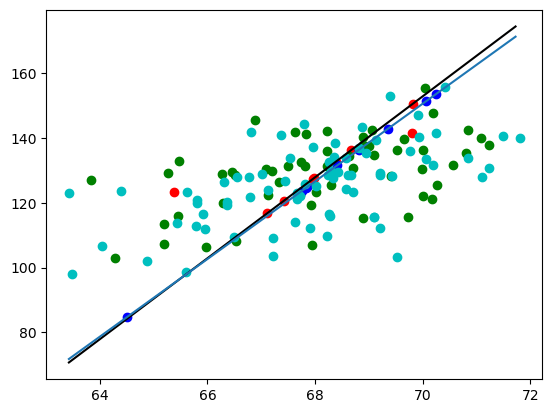

In [297]:
plt.scatter(tmp1['Height'],tmp1['Weight'],color='r')
plt.scatter(man_df['Height'],man_df['Weight'],color='g')
plt.scatter(tmp2['Height'],tmp2['Weight'],color='b')
plt.scatter(wom_df['Height'],wom_df['Weight'],color='c')
x= np.arange(np.min(clean_df['Height']),np.max(clean_df['Height']),0.1)
plt.plot(x,((x-tmp1_w0)/tmp1_w1)[0],color='black')
plt.plot(x,((x-tmp2_w0)/tmp2_w1)[0])
plt.show()

#### cleaning input dataset(With BMI)

In [298]:
nan_df = example_df[example_df['Height'].isna() | example_df['Weight'].isna() | example_df['BMI'].isna()]
nan_df.reset_index(drop=True,inplace=True)
nan_df

,Sex,Age,Height,Weight,BMI
0,Female,35,NaN,136.4873,3.0
1,Male,35,69.80204,141.4947,NaN
2,Male,25,NaN,120.6672,3.0
3,Male,34,NaN,127.4516,NaN
4,Female,31,NaN,142.9733,3.0
5,Male,21,NaN,136.2225,3.0
6,Female,31,NaN,124.8591,3.0
7,Male,31,NaN,116.8190,2.0
8,Male,21,69.82117,NaN,NaN
9,Male,27,65.38356,123.4892,NaN


In [299]:
nan_df['BMI'] = nan_df['BMI'].ffill()
one_df = clean_df[clean_df['BMI']==1.0]
two_df = clean_df[clean_df['BMI']==2.0]
thr_df = clean_df[clean_df['BMI']==3.0]
one_nan_df = nan_df[nan_df['BMI']==1.0]
two_nan_df = nan_df[nan_df['BMI']==2.0]
thr_nan_df = nan_df[nan_df['BMI']==3.0]

In [300]:
tmp1,tmp1_w1,tmp1_w0 = fillWH(two_df,two_nan_df)
tmp2,tmp2_w1,tmp2_w0 = fillWH(thr_df,thr_nan_df)

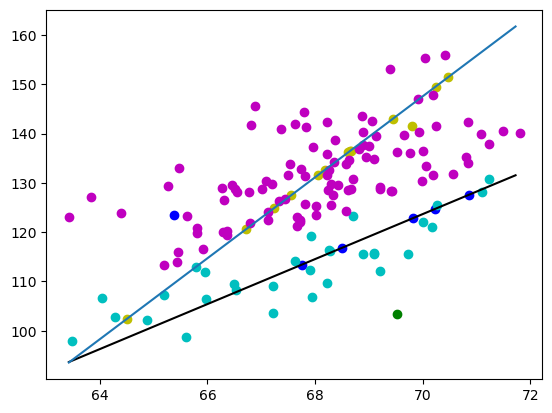

In [301]:
plt.scatter(one_nan_df['Height'],one_nan_df['Weight'],color='r')# None
plt.scatter(one_df['Height'],one_df['Weight'],color='g')# green
plt.scatter(tmp1['Height'],tmp1['Weight'],color='b')#blue
plt.scatter(two_df['Height'],two_df['Weight'],color='c')#청록
plt.scatter(tmp2['Height'],tmp2['Weight'],color='y')#yellow
plt.scatter(thr_df['Height'],thr_df['Weight'],color='m')#puple
x= np.arange(np.min(clean_df['Height']),np.max(clean_df['Height']),0.1)
plt.plot(x,((x-tmp1_w0)/tmp1_w1)[0],color='black')
plt.plot(x,((x-tmp2_w0)/tmp2_w1)[0])
plt.show()